## Stock prices
historical

/Users/rolandggill/anaconda3/lib/python3.6/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


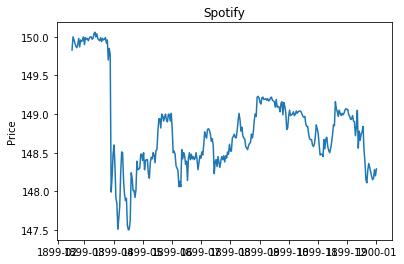

In [2]:
'''
Query some of our datasets before we talk.
After you've played around with our datasets, 
share with me any feedbacks or suggestions you may have.
'''
import requests
import datetime
import numpy as np
import pandas as pd
import json
from matplotlib import pyplot as plt
import matplotlib.dates as mdates
import statistics
API_KEY = "twaDPq1xoWyN7HpcHo3uNm5eSLEP2JZM"

def get__realtime_stock_price(ticker):
    response = requests.get('https://api.unibit.ai/api/realtimestock/'+ticker+'?AccessKey='+API_KEY)
    data_str = response.text
    parsed_data = json.loads(data_str)
    return(parsed_data)
    

spot = get__realtime_stock_price('SPOT')
spot_df = pd.DataFrame(data = spot['Realtime Stock price'])
# format dates 
spot_datemin = datetime.datetime.strptime(spot_df.minute.min(), "%M:%S:%f").date()
spot_datelist = [spot_datemin - datetime.timedelta(days=x) for x in range(0, len(spot_df.minute))]

# plot 
plt.plot(spot_datelist, spot_df.price)
plt.title("Spotify")
plt.ylabel("Price")
plt.show()

# Historical prices
bitcoin prices aren't current

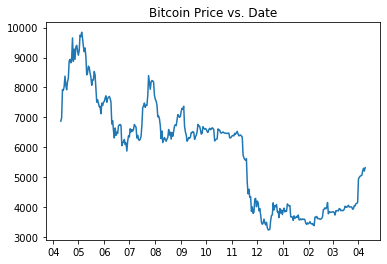

In [7]:
import requests
import datetime
import numpy as np
import pandas as pd
import json
import matplotlib as mlp
from matplotlib import pyplot as plt
import matplotlib.dates as mdates
# import statistics

API_KEY = "twaDPq1xoWyN7HpcHo3uNm5eSLEP2JZM"

def get_historical_prices(price, currency, rng = '1y'):
    url = "https://api.unibit.ai/api/"+price+"/"+currency+"?range="+rng+"&interval=1&datatype=json&AccessKey="+API_KEY
    response = requests.get(url)
    data_str = response.text 
    parsed_data = json.loads(data_str)
    return(parsed_data)

fig, ax = plt.subplots()

btc_prices = get_historical_prices("historicalcryptoprice", "BTC")

btc_frame = pd.DataFrame(btc_prices['Crypto Historical Price'])

btc_datemin = datetime.datetime.strptime(btc_frame.date.min(), "%Y-%m-%d").date()

btc_date_list = [btc_datemin - datetime.timedelta(days=x) for x in range(0, len(btc_frame.date))]

months = mdates.MonthLocator()
monthsFmt = mdates.DateFormatter('%m')
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(monthsFmt)

ax.plot(btc_date_list, btc_frame.close)
plt.title('Bitcoin Price vs. Date')

plt.show()

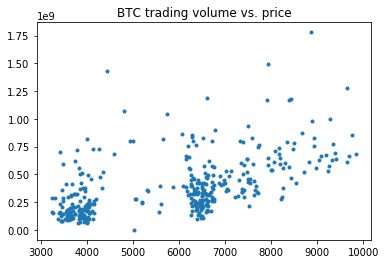

Correlation coefficient: 0.5489367944365579


In [10]:
# relationship between BTC trading volume and price
plt.plot(btc_frame.close, btc_frame.volume, '.')
plt.title("BTC trading volume vs. price")
plt.show()

# correlation between Bitcoin price and volume
print("Correlation coefficient:", np.corrcoef(btc_frame.volume, btc_frame.close)[0,1])


# Stocks news 

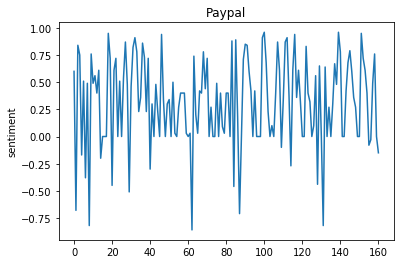

mean is 0.31540372670807454


In [3]:
import datetime
import numpy as np
import pandas as pd
import requests 
import json
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import statistics as stat

years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
yearsFmt = mdates.DateFormatter('%Y')

API_KEY = "twaDPq1xoWyN7HpcHo3uNm5eSLEP2JZM"

def get_news(ticker, rng = "1y"):
    url = "https://api.unibit.ai/api/news/sentiment/"+ticker+"?range="+rng+"&AccessKey="+API_KEY
    response = requests.get(url)
    data_str = response.text 
    parsed_data = json.loads(data_str)
    return(parsed_data)

pypl_news = pd.DataFrame(get_news("PYPL", rng = "1m")["Stock News"])

plt.plot(range(0,len(pypl_news)), pypl_news.sentiment)
plt.title("Paypal")
plt.ylabel("sentiment")
plt.show()

print("mean is " + str(stat.mean(pypl_news.sentiment)))
